In [2]:
#IPython notebook plot formatting
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

#from matplotlib import mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
import numpy as np

#This is the sensor model library
import models as sm

sm = reload(sm) #Reload it every time this cell is run (for when changes are made)

Populating the interactive namespace from numpy and matplotlib


In [3]:
#For each class of files, generate a general file name with placeholders for the number and inserting 'cap' or 'con'

#Water concentration data
'''airFileName = "22March/air%d%s.csv"
water00FileName = "28March/DI-Water/DI_water%d%s.csv"
water10FileName = "28March/NaCl-10/NaCl_10%d%s.csv"
water20FileName = "28March/NaCl-20/NaCl_20%d%s.csv"
water30FileName = "28March/NaCl-30/NaCl_30%d%s.csv"
water40FileName = "28March/NaCl-40/NaCl_40%d%s.csv"
water50FileName = "28March/NaCl-50/NaCl_50%d%s.csv"'''

#Aluminum foil data
airFileName = "4April/Air_%d%s.csv"
aluminumFileName = "4April/Al_%d%s.csv"

In [4]:
#Initialize arrays of sweeps, one for each known class

print "Opening data..."

subSize = 8 #Size of the data matrices (the whole thing is 8x8, but using a subset of the data makes everything faster)

#In each one, exclude the last element (that will go into the test array)
'''airData = [sm.Sweep(airFileName%(i,'%s'),subSize) for i in range(1,6)]
water00Data = [sm.Sweep(water00FileName%(i,'%s'),subSize) for i in range(1,6)]
water10Data = [sm.Sweep(water10FileName%(i,'%s'),subSize) for i in range(1,6)]
water20Data = [sm.Sweep(water20FileName%(i,'%s'),subSize) for i in range(1,6)]
water30Data = [sm.Sweep(water30FileName%(i,'%s'),subSize) for i in range(1,6)]
water40Data = [sm.Sweep(water40FileName%(i,'%s'),subSize) for i in range(2,6)]
water50Data = [sm.Sweep(water50FileName%(i,'%s'),subSize) for i in range(1,6)]'''

airData = [sm.Sweep(airFileName%(i,'%s'),subSize) for i in range(1,6)]
aluminumData = [sm.Sweep(aluminumFileName%(i,'%s'),subSize) for i in range(1,6)]
unknownData = [
    sm.Sweep("4April/Air_Aluminum_Diagonal_1%s.csv",subSize),
    sm.Sweep("4April/Air_Aluminum_Rect_1%s.csv",subSize)
]

Opening data...


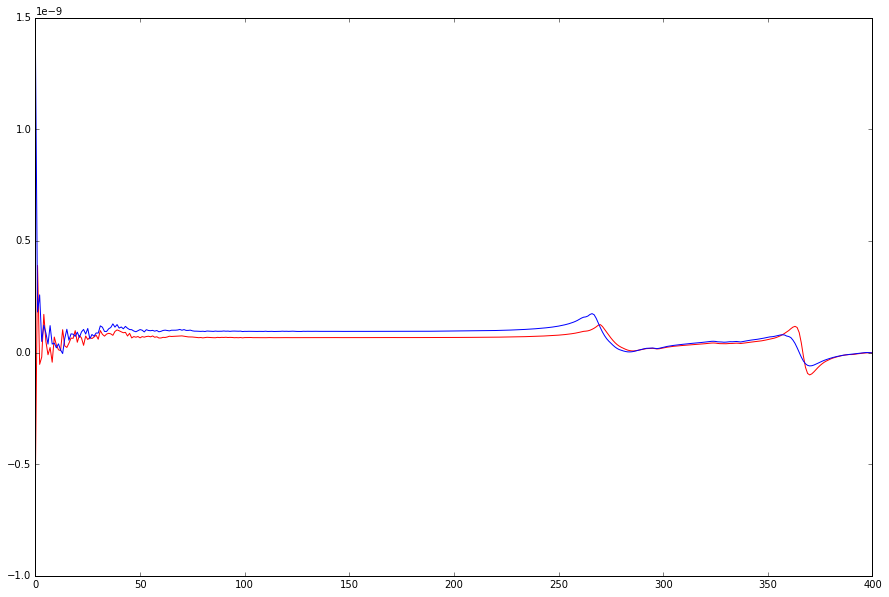

In [5]:
#Plot one intersection of one sweep from each class, just to get a sense of how the data looks

m = 401
X = range(m)

trial = 1

af = file(airFileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'red')
af.close()

'''af = file(water00FileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'orange')
af.close()

af = file(water10FileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'yellow')
af.close()

af = file(water20FileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'green')
af.close()

af = file(water30FileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'blue')
af.close()

af = file(water40FileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'purple')
af.close()

af = file(water50FileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'black')
af.close()'''

af = file(aluminumFileName%(trial,'cap'),'r')
dat = [float(i) for i in af.readline().split(',')]
plt.plot(X,dat,'blue')
af.close()

plt.show()

In [6]:
#Initialize an array of test sweeps

'''testingData = [
    sm.Sweep(airFileName%(10,'%s'),subSize),
    sm.Sweep(water00FileName%(10,'%s'),subSize),
    sm.Sweep(water10FileName%(10,'%s'),subSize),
    sm.Sweep(water20FileName%(10,'%s'),subSize),
    sm.Sweep(water30FileName%(10,'%s'),subSize),
    sm.Sweep(water40FileName%(10,'%s'),subSize),
    sm.Sweep(water50FileName%(10,'%s'),subSize)
]'''

testingData = unknownData

In [7]:
#Initialize a model for each class

print "Initializing models..."

order = 60

airModel = sm.Model(order,'Air')
'''water00Model = sm.Model(order,'DI Water')
water10Model = sm.Model(order,'10 mM NaCl')
water20Model = sm.Model(order,'20 mM NaCl')
water30Model = sm.Model(order,'30 mM NaCl')
water40Model = sm.Model(order,'40 mM NaCl')
water50Model = sm.Model(order,'50 mM NaCl')'''

aluminumModel = sm.Model(order,'Aluminum')

Initializing models...


In [8]:
#Train each model

print "Training models..."

airModel.train(airData)
'''water00Model.train(water00Data)
water10Model.train(water10Data)
water20Model.train(water20Data)
water30Model.train(water30Data)
water40Model.train(water40Data)
water50Model.train(water50Data)'''

aluminumModel.train(aluminumData)

Training models...
Training Air model...
Training Aluminum model...


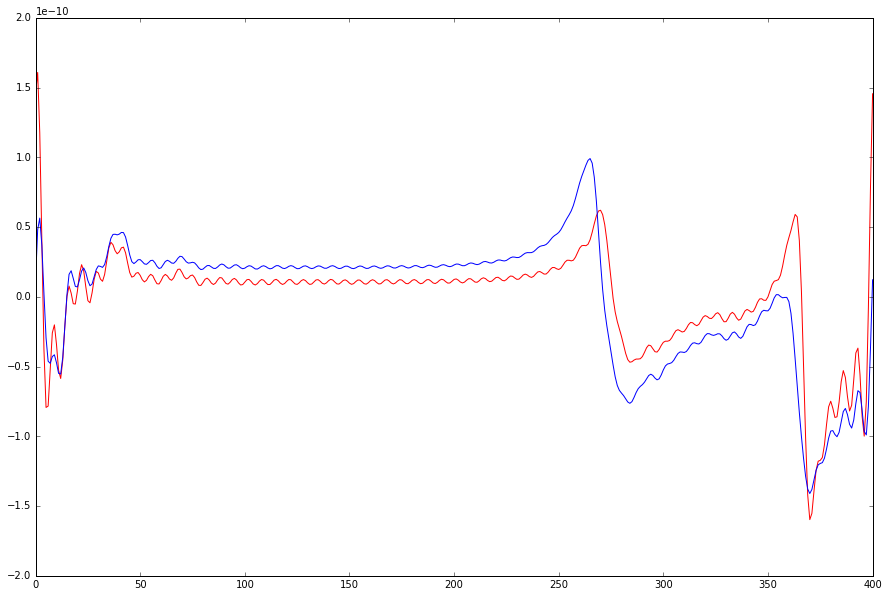

In [9]:
#Generate 'average' plots of the data from each model

m = 401
X = range(m)

T = X[m-1]-X[0]
w = (2*3.1415926535)/T

d = 1

avg = []
for n in range(-order,order+1):
    avg.append(np.average([airData[t].c(n,0,0) for t in range(5)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'red')

avg = []
for n in range(-order,order+1):
    avg.append(np.average([aluminumData[t].c(n,0,0) for t in range(5)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'blue')

'''avg = []
for n in range(-order,order+1):
    avg.append(np.average([water00Data[t].c(n,0,0) for t in range(5)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'orange')

avg = []
for n in range(-order,order+1):
    avg.append(np.average([water10Data[t].c(n,0,0) for t in range(5)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'yellow')

avg = []
for n in range(-order,order+1):
    avg.append(np.average([water20Data[t].c(n,0,0) for t in range(5)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'green')

avg = []
for n in range(-order,order+1):
    avg.append(np.average([water30Data[t].c(n,0,0) for t in range(5)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'blue')

avg = []
for n in range(-order,order+1):
    avg.append(np.average([water40Data[t].c(n,0,0) for t in range(4)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'purple')

avg = []
for n in range(-order,order+1):
    avg.append(np.average([water50Data[t].c(n,0,0) for t in range(5)]))
def Cavg(x):
    ret = sum([avg[n+order]*(2.71828**(1j*n*w*x)) for n in range(-order,order+1)])
    return np.real(ret)
plt.plot(X[::d],[Cavg(x) for x in X[::d]],'black')'''


plt.show()

In [10]:
#Test the testing array with each model

print "Testing..."

print "Testing air model..."
airModel.test(testingData)

'''print "Testing DI water model..."
water00Model.test(testingData)

print "Testing 10 mM NaCl model..."
water10Model.test(testingData)

print "Testing 20 mM NaCl model..."
water20Model.test(testingData)

print "Testing 30 mM NaCl model..."
water30Model.test(testingData)

print "Testing 40 mM NaCl model..."
water40Model.test(testingData)

print "Testing 50 mM NaCl model..."
water50Model.test(testingData)'''

print "Testing aluminum model..."
aluminumModel.test(testingData)

Testing...
Testing air model...
Testing aluminum model...


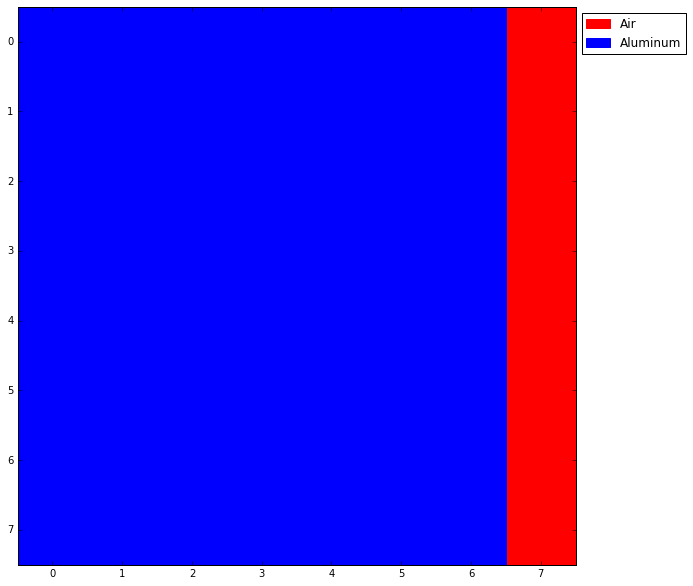

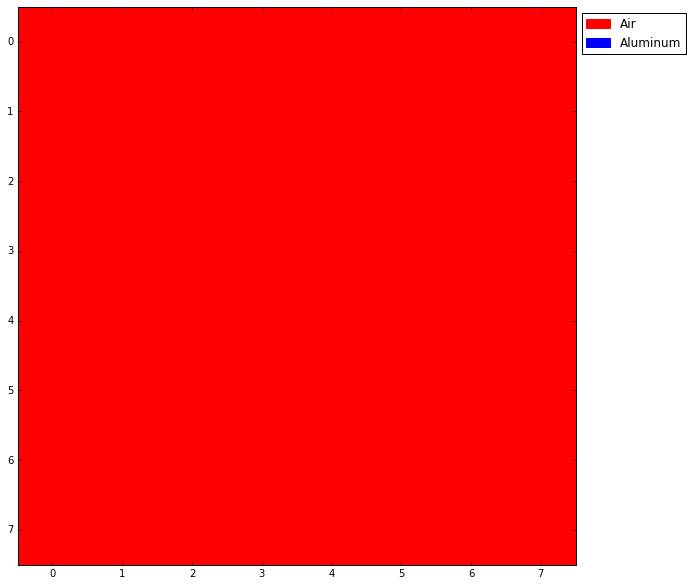

In [14]:
for sweep in range(len(testingData)):
    zvals = [[
            0 if i == 'Air' else
            1 if i == 'Aluminum' else 2
            for i in j] for j in testingData[sweep].genClass()]

    cmap = mpl.colors.ListedColormap(['red','blue'])
    bounds=[0,1,2]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    # tell imshow about color map so that only set colors are used
    img = pyplot.imshow(zvals,interpolation='nearest',
                        cmap = cmap,norm=norm)

    plt.legend(handles=[
            mpat.Patch(color='red', label='Air'),
            mpat.Patch(color='blue', label='Aluminum')
        ],loc="upper left", bbox_to_anchor=(1,1))

    plt.show()

In [15]:
for sweep in range(len(testingData)):
    zvals = [[
            0 if i == 'Air' else
            1 if i == 'DI Water' else
            2 if i == '10 mM NaCl' else
            3 if i == '20 mM NaCl' else
            4 if i == '30 mM NaCl' else
            5 if i == '40 mM NaCl' else
            6 if i == '50 mM NaCl' else 7
            for i in j] for j in testingData[sweep].genClass()]

    cmap = mpl.colors.ListedColormap(['red','orange','yellow','green','blue','purple','black'])
    bounds=[0,1,2,3,4,5,6,7]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    # tell imshow about color map so that only set colors are used
    img = pyplot.imshow(zvals,interpolation='nearest',
                        cmap = cmap,norm=norm)

    plt.legend(handles=[
            mpat.Patch(color='red', label='Air'),
            mpat.Patch(color='orange', label='DI water'),
            mpat.Patch(color='yellow', label='10 mM NaCl'),
            mpat.Patch(color='green', label='20 mM NaCl'),
            mpat.Patch(color='blue', label='30 mM NaCl'),
            mpat.Patch(color='purple', label='40 mM NaCl'),
            mpat.Patch(color='black', label='50 mM NaCl')
        ],loc="upper left", bbox_to_anchor=(1,1))

    plt.show()

NameError: name 'asdf' is not defined